# Simple Linear Regression: Statsmodels

(Note: checking model assumptions and preprocessing excluded)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:
url = "https://raw.githubusercontent.com/lucaskienast/Regression/main/1)%20Linear%20Regression/real_estate_price_size.csv"
df = pd.read_csv(url)
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Build Simple Linear Regression Model

In [4]:
# declare targets and features
y = df["price"]
X1 = df[["size"]]

In [5]:
# build model
X = sm.add_constant(X1) # y-intercept
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           8.13e-31
Time:                        13:37:03   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.0

In [6]:
# get model parameters
alpha = results.params[0]
beta1 = results.params[1]

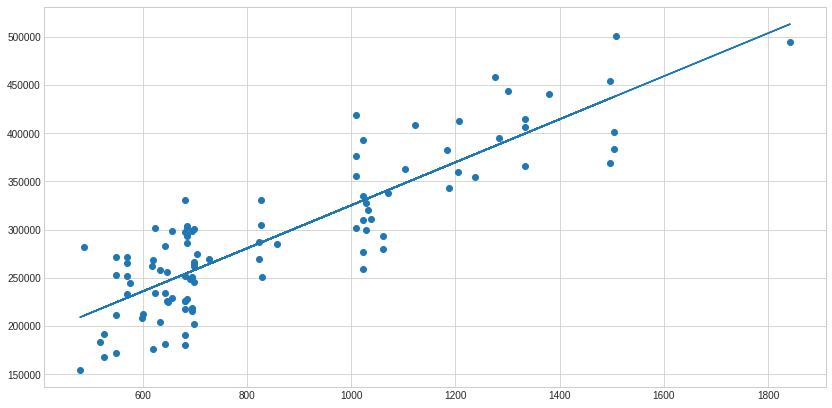

In [7]:
# plot data with regression line
plt.figure(figsize=(14,7))
plt.scatter(df["size"], df["price"])
plt.plot(df["size"], alpha+beta1*df["size"])
plt.show()

## Make Prediction

In [8]:
# plug in value of interest and get prediction
x = 1700
yhat = alpha + beta1 * x
yhat

481316.4642120618